In [11]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [12]:
# !pip install matplotlib

In [5]:
# os.path.dirname(os.path.abspath(__file__))
# os.path.abspath(os.curdir)
# os.curdir
# os.path.abspath('.')
# os.path.dirname(os.path.abspath('.'))

In [20]:
PATH = os.path.dirname(os.path.abspath('.')) + '\data\\'
# img_path = '\data\\'
img_name= 'warped_img.png'

img = cv2.imread(PATH+img_name)

In [21]:
cv2.imshow('sc', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
def display(im_data):
    dpi = 80
#     im_data = plt.imread(im_path)
    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

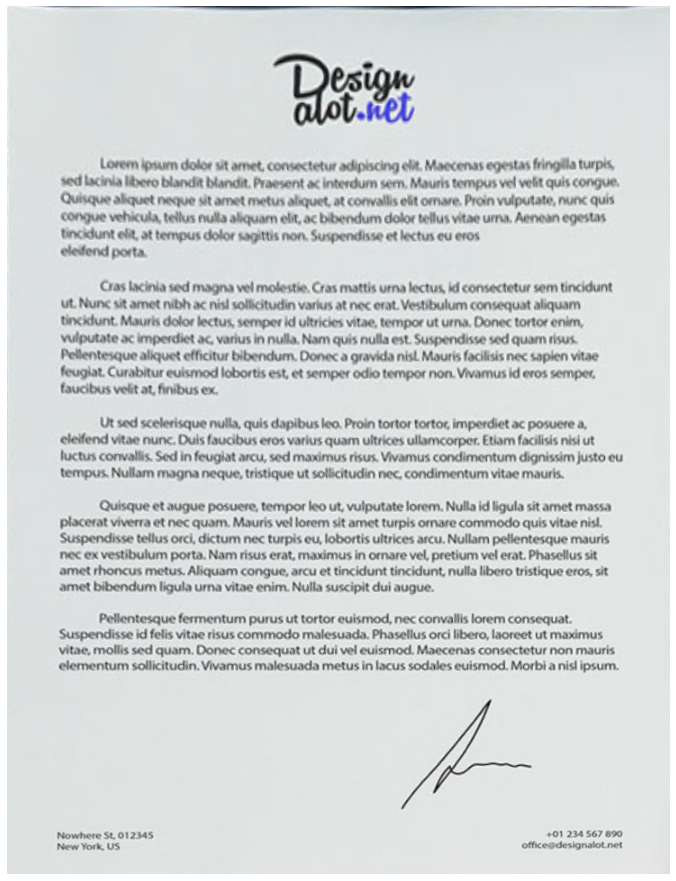

In [23]:
display(img)

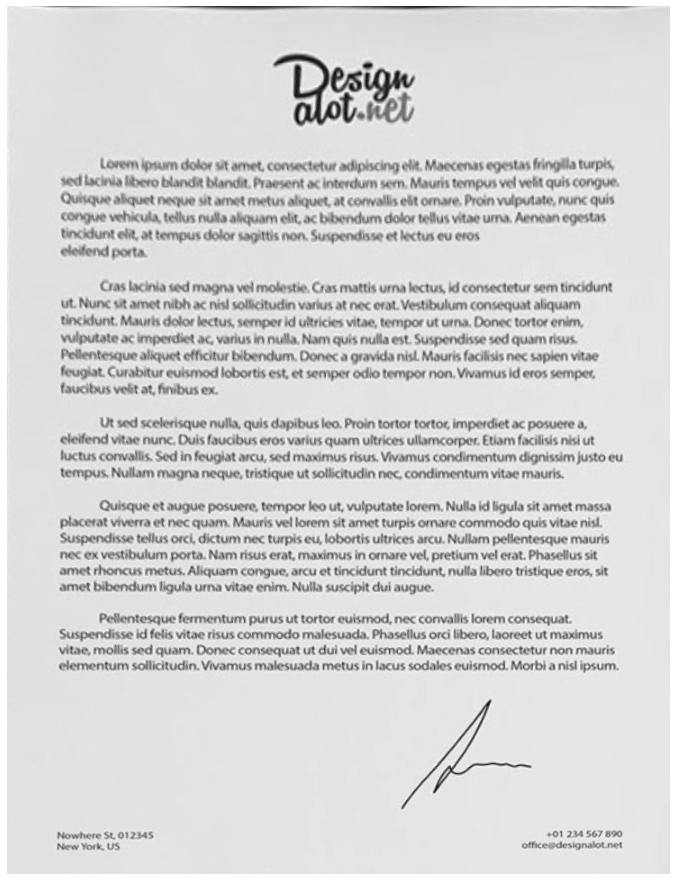

In [27]:
def greyscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

grey_img = greyscale(img)
display(grey_img)

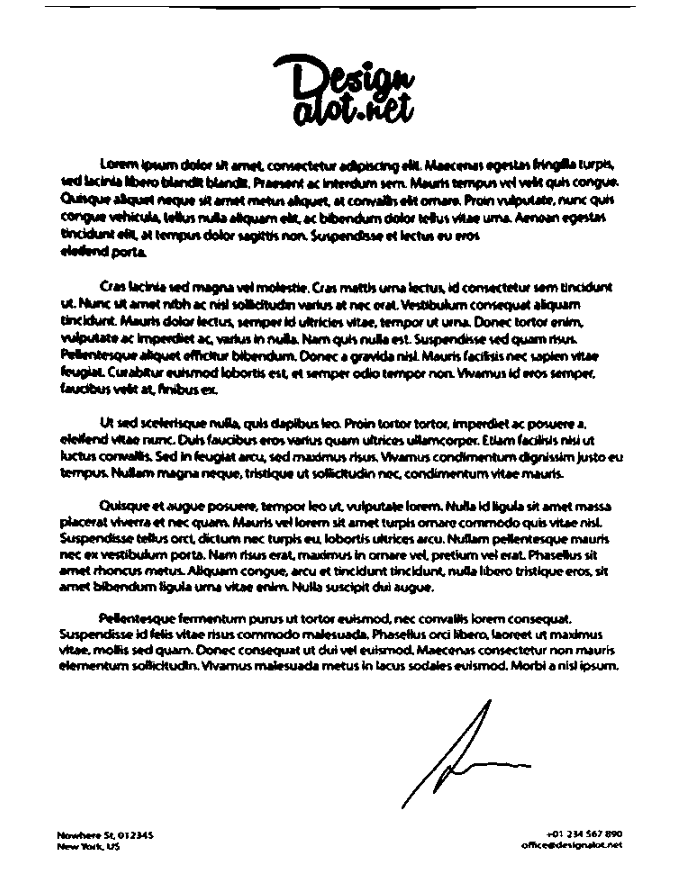

In [28]:
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

thresh_img = thresholding(grey_img)
display(thresh_img)

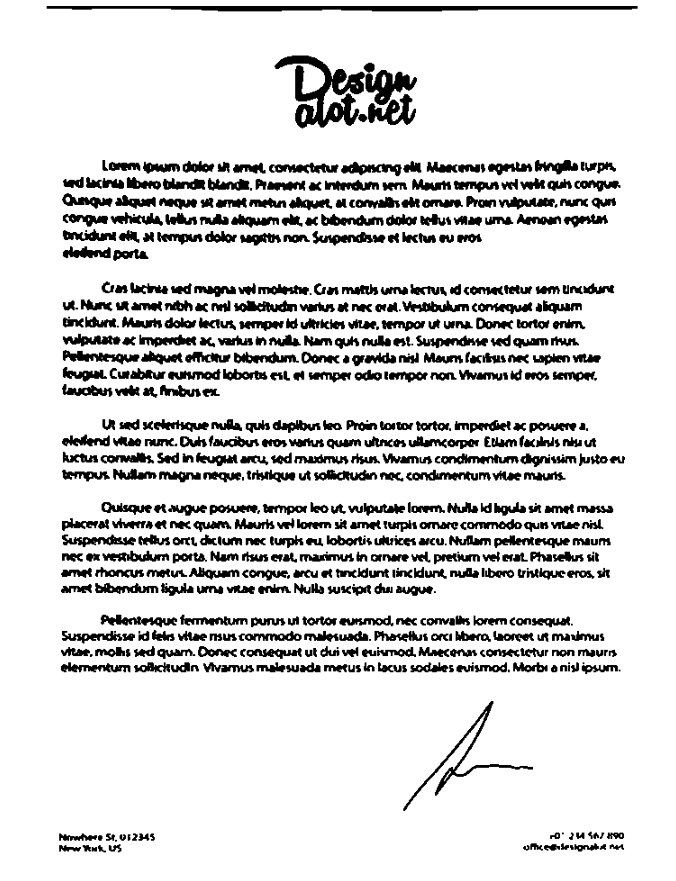

In [42]:
def noise_removal(image):
#     image = cv2.bitwise_not(image)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#     image = cv2.bitwise_not(image)
#     image = cv2.medianBlur(image, 3)
    return image

no_noise_img = noise_removal(thresh_img)
display(no_noise_img)

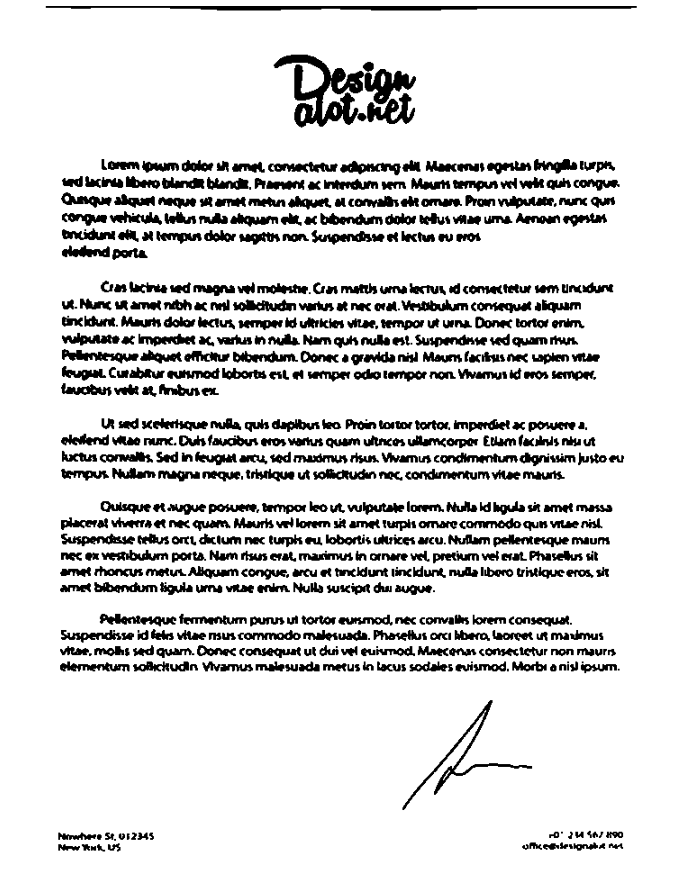

In [51]:
def thin_font(image):
#     image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.erode(image, kernel, iterations=1)
#     image = cv2.bitwise_not(image)
    return image

thin_img = thin_font(thresh_img)
display(thin_img)